<a href="https://colab.research.google.com/github/n-erfan/Data-Mining-Machine-Learning/blob/main/MiniProject3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Get the data file allFaces.mat from Canvas (you can read .mat files both in Matlab and Python). Load the file load allFaces.mat
Face pictures of 38 people with several different room lightings are stored in this file. The
size of each picture is n=192 by m=168. Each picture is reshaped as a vector of 32256 by 1 and
stored as a column in the matrix named faces. When you load the file, you get this matrix and
also a vector named nfaces. The vector nfaces is a 1 by 38 row vector. The first element of
nfaces shows howmany pictures of person # 1 is stored in the faces matrix. For instance,
nfaces(1)=64. This means that from column 1 to column 64 we have pictures of person#1 with
64 different room lightings. Nfaces(2) = 64 as well. This means that in the matrix faces from
column 65 to 128 we have 64 pictures of person # 2, and so on. Not all element of nfaces are
equal.

In [ ]:
#Access to Read from my Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import necessary librarires
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.io

In [ ]:
mat_dic = scipy.io.loadmat('/content/gdrive/MyDrive/Dataset/Data Mining and Machine Learning/allFaces.mat')

In [ ]:
mat_dic

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep  4 19:53:55 2014',
 '__version__': '1.0',
 '__globals__': [],
 'faces': array([[80, 94, 59, ...,  3,  4,  4],
        [81, 87, 67, ...,  4,  4,  3],
        [80, 88, 66, ...,  2,  4,  4],
        ...,
        [14,  7,  6, ...,  0,  1,  1],
        [14,  9,  6, ...,  1,  1,  0],
        [11,  8,  7, ...,  1,  1,  2]], dtype=uint8),
 'n': array([[192]], dtype=uint8),
 'm': array([[168]], dtype=uint8),
 'sub': array([[(array([[39]], dtype=uint8), array([[70, 84, 88, ...,  3,  4,  4],
                [74, 83, 95, ...,  4,  4,  3],
                [69, 82, 97, ...,  2,  4,  4],
                ...,
                [ 1,  2,  3, ...,  0,  1,  1],
                [ 1,  3,  3, ...,  1,  1,  0],
                [ 2,  2,  3, ...,  1,  1,  2]], dtype=uint8), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          

In [ ]:
mat_dic['faces'].shape

(32256, 2410)

In [ ]:
mat_dic['nfaces']

array([[64, 62, 64, 64, 62, 64, 64, 64, 64, 64, 60, 59, 60, 63, 62, 63,
        63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 64, 64, 64, 64, 64]], dtype=uint8)

In [ ]:
mat_dic['nfaces'][0][0]

64

In [ ]:
mat_dic['nfaces'].sum()

2410

In [ ]:
# For person#1
person1 = mat_dic['faces'][:,:mat_dic['nfaces'][0][0]]
person1.shape

(32256, 64)

1. A First images of all persons 1 to 38

In [ ]:
first_images = np.zeros((192,168, 38))

In [ ]:
mat_dic['nfaces'][0][0]

64

In [ ]:
person = np.empty((32256, 38))

In [ ]:
mat_dic['nfaces'][0][2]

64

In [ ]:
np.sum(mat_dic['nfaces'][:,:2])

126

In [ ]:
for i in range(38):
  print(np.sum(mat_dic['nfaces'][:,:i]))

0
64
126
190
254
316
380
444
508
572
636
696
755
815
878
940
1003
1066
1130
1194
1258
1322
1386
1450
1514
1578
1642
1706
1770
1834
1898
1962
2026
2090
2154
2218
2282
2346


In [ ]:
mat_dic['faces'][:,np.sum(mat_dic['nfaces'][:,:i])].reshape(32256,1).shape

(32256, 1)

In [ ]:
for i in range(38):
  if i == 0:
    person = mat_dic['faces'][:,np.sum(mat_dic['nfaces'][:,:i])].reshape(32256,1)
  else:
    person = np.column_stack((person, mat_dic['faces'][:,np.sum(mat_dic['nfaces'][:,:i])].reshape(32256,1)))

In [ ]:
person.shape

(32256, 38)

In [ ]:
for k in range(38):
  dummy = person[:, k].reshape(192, 168, order='F')
  first_images[:, :, k] = dummy

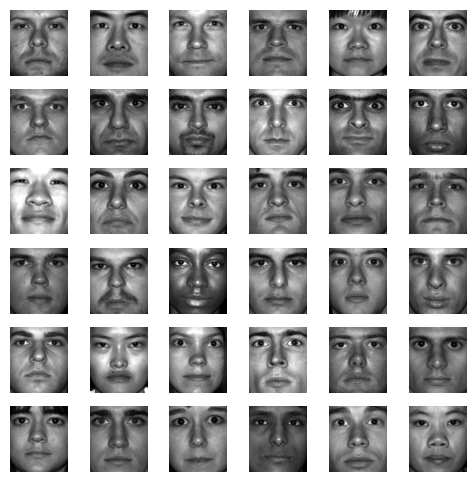

In [ ]:
# First images of 36 people
fig, axs = plt.subplots(6, 6, figsize=(6, 6))

for i in range(6):
  for j in range(6):
    k = i*6 + j  # Calculate the index of the image
    axs[i, j].imshow(first_images[:, :, k], cmap='gray')
    axs[i, j].axis('off')  # Turn off axis labels
    axs[i, j].set_aspect('equal', adjustable='box')

plt.show()

1. B Image for Person#1

In [ ]:
x = np.zeros((192, 168, 64))

In [ ]:
# save them in a 3d array
for k in range(64):
  dummy = person1[:, k].reshape(192, 168, order='F')
  x[:, :, k] = dummy

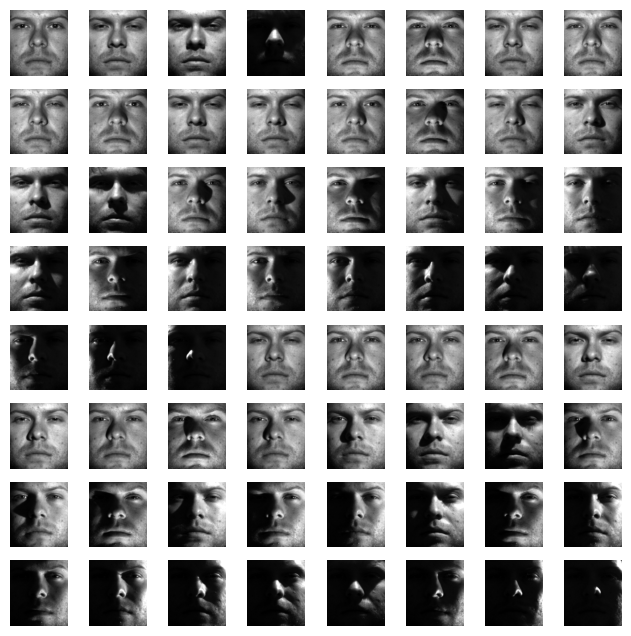

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(8, 8))

for i in range(8):
  for j in range(8):
    k = i * 8 + j  # Calculate the index of the image
    axs[i, j].imshow(x[:, :, k], cmap='gray')
    axs[i, j].axis('off')  # Turn off axis labels
    axs[i, j].set_aspect('equal', adjustable='box')

plt.show()

2. Load all faces with all different lightings from person # 1 to person # 36. Calculate the
average face picture. Subtract that average from all pictures. Store these average
subtracted faces in matrix X.

In [ ]:
# shows the facial image of a given image vector
def show_face(image_vector):
  image = image_vector.reshape(192, 168, order='F')
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()

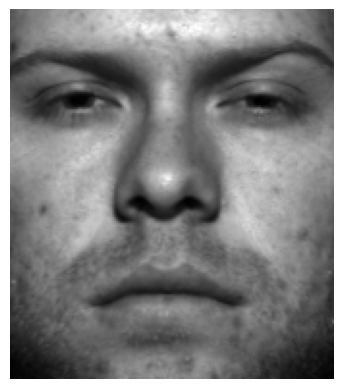

In [ ]:
show_face(person1[:,1])

In [ ]:
faces = mat_dic['faces']
nfaces = mat_dic['nfaces']

In [ ]:
# Select faces of person #1 to person #36
selected_faces = faces[:, :np.sum(nfaces[:,:36-1])]
selected_faces.shape

(32256, 2218)

In [ ]:
# row-wise average of all pixels
average_face = np.mean(selected_faces, axis = 1).reshape((32256,1))

In [ ]:
# Store average subtracted face in X
X = faces - average_face

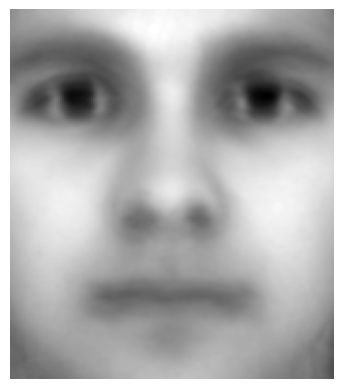

In [ ]:
# the average face
show_face(average_face)

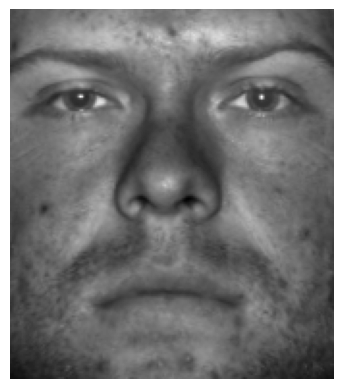

In [ ]:
# show X
show_face(X[:,0])

3. A. Calculate all singular values and singular vectors of X ( in Matlab: [U,S,V]=svd(X,’econ’) ).
Reshape these U vectors to 2-dimensional pictures of size 192 by 168. These are our
eigen faces. Plot the first 54 eigen faces.

In [ ]:
# Perform Economy Singular Value Decomposition (SVD) on X
U, S, Vt = np.linalg.svd(X, full_matrices=False)

In [ ]:
U.shape

(32256, 2410)

In [ ]:
Vt.shape

(2410, 2410)

In [ ]:
eigenfaces = np.zeros((192, 168, U.shape[1]))
for i in range(U.shape[1]):
  eigenfaces[:,:,i] =  U[:, i].reshape(192, 168, order='F')

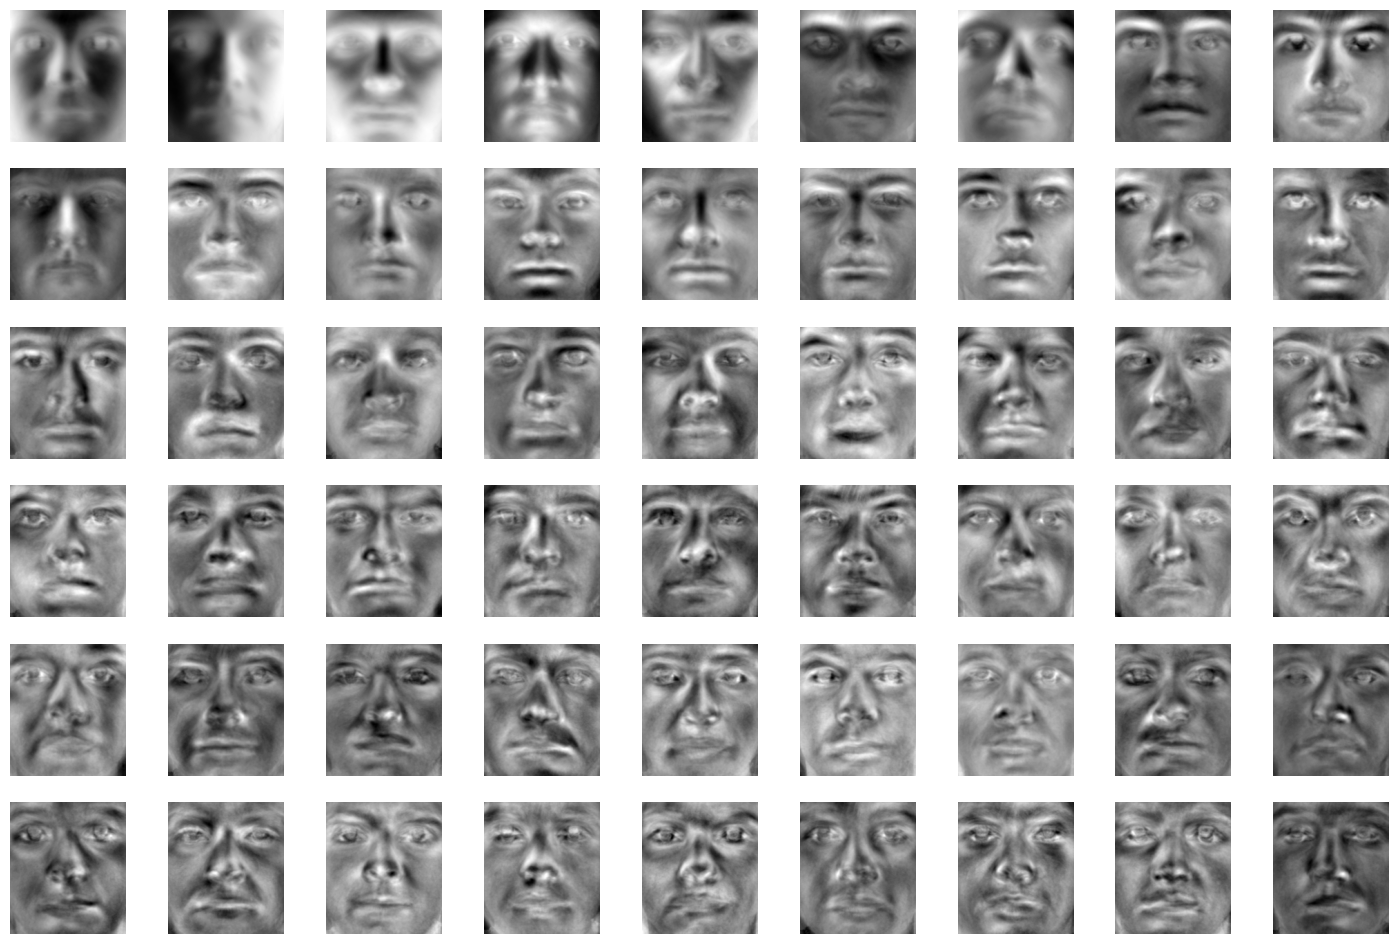

In [ ]:
# Plot the first 54 eigenfaces
fig, ax = plt.subplots(6, 9, figsize=(18, 12))
for i in range(54):
    ax[i // 9, i % 9].imshow(eigenfaces[:,:,i], cmap='gray')
    ax[i // 9, i % 9].axis('off')

plt.show()

The eigenfaces obtained from the Singular Value Decomposition (SVD) represent the principal components of the variation in given set of faces. Each eigenface captures a different pattern of variation present in the dataset. Each eigenface may not necessarily correspond directly to the detecting of specific features like eyes, nose, or lips, they collectively represent the most significant patterns that contribute to the maximum variations in these face images.

3. B. Compute the inner product of the first and the 5th eigen faces (do the computations with
vectors, before reshaping to 2-dimensional pictures). Are these eigen faces orthogonal?
How about the 10th eigen face and 15th eigen face? Are they all orthogonal?

In [ ]:
if round(U[:,0].T @ U[:,4],2) == 0 :
  print("The two are orthogonal")

The two are orthogonal


In [ ]:
if round(U[:,9].T @ U[:,14],2) == 0 :
  print("The two are orthogonal")

The two are orthogonal


4. Now let’s decompose the first picture of person # 37 to these eigen faces.

If we assume that vector V is the first picture of person # 37, then:

𝑉 ≈ ∑ 𝛼𝑖 𝑈𝑖,

i=1,...,𝑟

𝛼𝑖 = (𝑈𝑖)^𝑇 𝑉

We are truncating at some r. What is the maximum value of r? Plot the approximation of vector V as a 2-dimensional picture for r=5.

In [ ]:
nfaces[0][37-1]

64

In [ ]:
V = faces[:,np.sum(nfaces[:,:37-1])].reshape(32256,1)

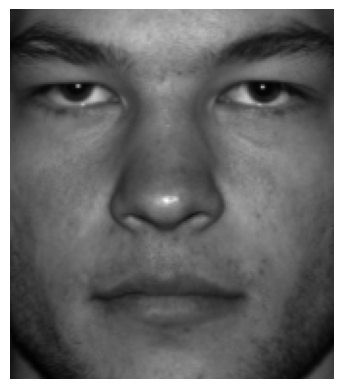

In [ ]:
show_face(V)

In [ ]:
def app_vec(V, U, r):
  U = U[:,:r]
  alpha = U.T @ V
  V_app = U @ alpha
  return V_app

In [ ]:
U.shape

(32256, 2410)

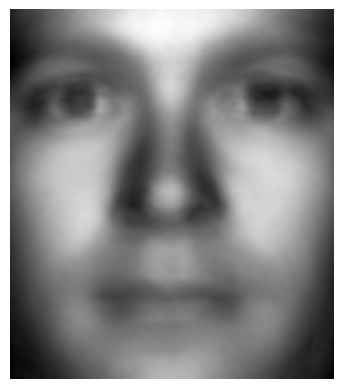

In [ ]:
show_face(app_vec(V, U, 5))

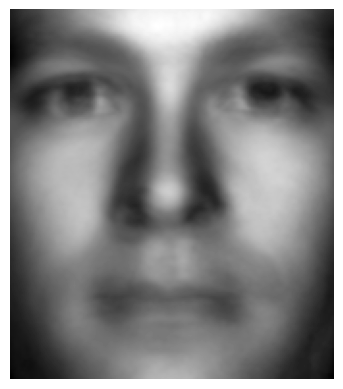

In [ ]:
show_face(app_vec(V, U, 10))

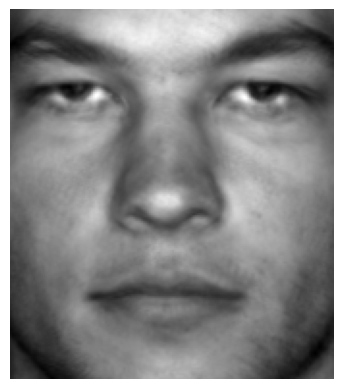

In [ ]:
show_face(app_vec(V, U, 200))

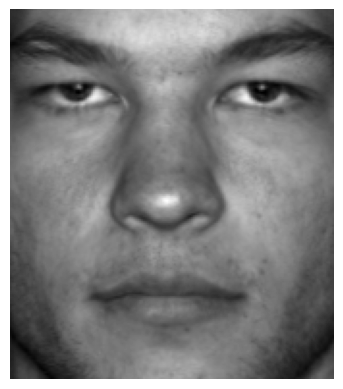

In [ ]:
show_face(app_vec(V, U, 800))

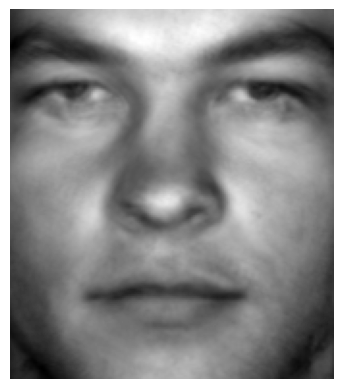

In [ ]:
show_face(app_vec(V, U, 100))

Person# 37 is quite recognizable at r=100, with his eyes, nose and lips discernible. So, it is a decent approximation.

5. Plot singular values (in a semi-logarithmic scale, horizontal axis representing the index,
vertical axis representing the value of the singular value, vertical axis is scaled
logarithmically). Do you see a good point for truncation?

In [ ]:
S.shape

(2410,)

In [ ]:
S[2410-1]

3.0018403618371455e-11

In [ ]:
len(S)

2410

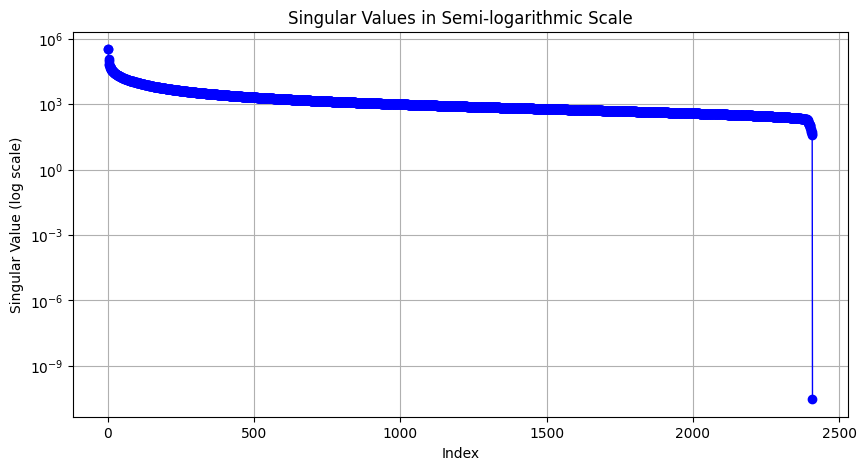

In [ ]:
singular_values = S

# Plotting the singular values in a semi-logarithmic scale
plt.figure(figsize=(10, 5))
plt.semilogy(range(len(singular_values)), singular_values, marker='o', color='b', linestyle='-', linewidth=1)
plt.xlabel('Index')
plt.ylabel('Singular Value (log scale)')
plt.title('Singular Values in Semi-logarithmic Scale')
plt.grid(True)
plt.show()

By examining the plot, r = 750 looks like a decent threshold where the singular values exhibits very less change for further increase in indices until a large number for r that is close to m.

6. Get all 64 different pictures of Person # 2. How much of eigen face number 5 do you have in
each picture of person # 2? ( For instance, if 𝑉1 is the vector that represents the first picture
of person # 2, and 𝑈(5) is the 5th eigen face, 𝛼 = (𝑉1)𝑇 𝑈(5), we have 𝛼 amount of 5th
eigen face in the first picture of person 2).
How much of each eigen face 5 do we have in every picture of person # 2?
How much of each eigen face 6 do we have in every picture of person # 2?
Plot a 2-dimensional graph in which the horizontal axis is the 5th eigen face and vertical axis
is the 6th eigen face. In this plane mark much of each eigen faces 5th and 6th exists in all
pictures of person 2 (black color) and also person 7 (Red color). Can you use this graph to
implement a good classification algorithm for face recognition? Can you do this with SVM?

In [ ]:
# faces for person# 2 & 7
V_2 = faces[:,np.sum(nfaces[:,:2-1]):np.sum(nfaces[:,:3-1])]
V_7 = faces[:,np.sum(nfaces[:,:7-1]):np.sum(nfaces[:,:8-1])]

In [ ]:
# amount of eigen face 5 in the first picture of person#2
print("alpha =",V_2[:,0] @ U[:,5-1].reshape((len(U),1)))

alpha = [627.72585626]


In [ ]:
# alpha values for person# 2
alpha_2_5 = V_2.T @ U[:,5-1].reshape((len(U),1))
alpha_2_6 = V_2.T @ U[:,6-1].reshape((len(U),1))

In [ ]:
# alpha values for person# 7
alpha_7_5 = V_7.T @ U[:,5-1].reshape((len(U),1))
alpha_7_6 = V_7.T @ U[:,6-1].reshape((len(U),1))

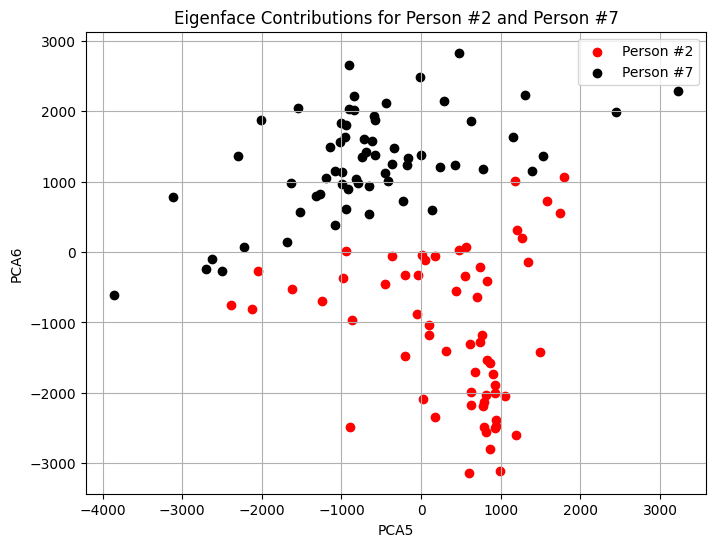

In [ ]:
# Plotting the contributions of eigenfaces for Person #2 and Person #7
plt.figure(figsize=(8, 6))
plt.scatter(alpha_2_5, alpha_2_6, color='red', label='Person #2')
plt.scatter(alpha_7_5, alpha_7_6, color='black', label='Person #7')
plt.xlabel('PCA5')
plt.ylabel('PCA6')
plt.title('Eigenface Contributions for Person #2 and Person #7')
plt.legend()
plt.grid(True)
plt.show()

This visualization helps in understanding how these eigenfaces differentiate between individuals as we can roughly make out a decision boundary between the two persons. This can be used as features for classification algorithms like SVM to define the decision boundary and be used in face recognition tasks.

# **Convert the file to HTML**

In [ ]:
%%shell
jupyter nbconvert --to html "/content/gdrive/MyDrive/Colab Notebooks/MiniProject3.ipynb"

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/MiniProject3.ipynb to html
[NbConvertApp] Writing 3017627 bytes to /content/gdrive/MyDrive/Colab Notebooks/MiniProject3.html
